In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import nltk
import matplotlib.pyplot as plt
import tempun

In [2]:
# global parameters for plots
plt.style.use("seaborn-v0_8-white")
plt.rcParams['figure.figsize'] = (4.5, 3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [3]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [4]:
coins["working_index"] = range(len(coins))

In [5]:
coins["random_dates"] = coins.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, seed=row["working_index"]), axis=1)
def get_first_random(random_dates):
    try:
        return random_dates[0]
    except:
        return None
coins["date_random"] = coins["random_dates"].apply(get_first_random)

In [6]:
coins.head(5)

,@id,@type,ontology#hasAuthority,ontology#hasDenomination,ontology#hasEndDate,ontology#hasManufacture,ontology#hasMaterial,ontology#hasMint,@id_obverse,ontology#hasRegion,...,ontology#hasPortrait_reverse,description_reverse,ontology#hasControlmark_reverse,not_before,not_after,date_avr,deities,working_index,random_dates,date_random
1,http://numismatics.org/ocre/id/ric.4.ph_i.28A,"[http://www.w3.org/2004/02/skos/core#Concept, ...",philip_the_arab,aureus,0247-01-01,struck,av,rome,ric.4.ph_i.28A#obverse,italy,...,nomisma.rdf,"Annona, draped, standing left, holding corn-ea...",None,244.0,247.0,246.0,[Annona],0,"[246, 246, 246, 246, 245, 246, 245, 247, 247, ...",246.0
4,http://numismatics.org/ocre/id/ric.4.crl.191,"[http://www.w3.org/2004/02/skos/core#Concept, ...",caracalla,denarius,0211-01-01,struck,ar,rome,ric.4.crl.191#obverse,italy,...,80685,"Virtus, helmeted, draped, standing right, left...",None,211.0,211.0,211.0,[Virtus],1,"[211, 211, 211, 211, 211, 211, 211, 211, 211, ...",211.0
5,http://numismatics.org/ocre/id/ric.7.ar.2,"[http://nomisma.org/ontology#TypeSeriesItem, h...",constantine_i,solidus,0313-01-01,struck,av,arelate,ric.7.ar.2#obverse,gallia,...,,"TIA; on ground to left, helmet; on ground to r...",None,313.0,313.0,313.0,[],2,"[313, 313, 313, 313, 313, 313, 313, 313, 313, ...",313.0
6,http://numismatics.org/ocre/id/ric.2_1(2).tit.288,"[http://nomisma.org/ontology#TypeSeriesItem, h...",titus,sestertius,0081-01-01,struck,ae,rome,ric.2_1(2).tit.288#obverse,italy,...,76227,"Pax standing left, holding branch and cornucopiae",None,80.0,81.0,80.0,[Pax],3,"[81, 81, 80, 81, 81, 81, 80, 80, 80, 80]",81.0
7,http://numismatics.org/ocre/id/ric.5.cara.745,"[http://nomisma.org/ontology#TypeSeriesItem, h...",carausius,antoninianus,0293-01-01,struck,ar,uncertain_value,ric.5.cara.745#obverse,britannia,...,57060,"Minerva, helmeted, draped, standing left, hold...",None,286.0,293.0,290.0,[Minerva],4,"[293, 290, 293, 291, 291, 288, 293, 286, 288, ...",293.0


In [7]:
deities = ['Victory', 'Pax', 'Mars', 'Jupiter', 'Securitas', 'Virtus','Liberalitas',
'Salus', 'Pietas', 'Pudicitia', 'Concordia', 'Aequitas']

In [8]:
start, stop = 99, 250
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_random"].between(date-diff, date+diff)]
    deities_list_flat = [d for l in subset["deities"] for d in l]
    deities_count = len(deities_list_flat)
    deities_list_flat = [d for d in deities_list_flat if d in deities]
    deities_counts = nltk.FreqDist(deities_list_flat).most_common()
    most_common_total = np.sum([tup[1] for tup in deities_counts])
    #deities_counts.append(("rest",  deities_count - len(deities_list_flat)))
    deities_freqs_pct = dict([(tup[0], tup[1] / deities_count) for tup in deities_counts])
    data.append(deities_freqs_pct)

In [9]:
data_df = pd.DataFrame(data)
len(data_df)

151

In [10]:
df = data_df.pct_change()[1:].fillna(0)
df = df[deities]

In [11]:
corr = df.corr(method = 'spearman').round(2)
corr

,Victory,Pax,Mars,Jupiter,Securitas,Virtus,Liberalitas,Salus,Pietas,Pudicitia,Concordia,Aequitas
Victory,1.00,0.20,0.27,0.27,0.07,0.09,0.07,-0.06,-0.18,0.00,-0.06,0.11
Pax,0.20,1.00,0.19,0.18,-0.04,0.13,0.13,-0.01,0.01,0.01,0.06,0.13
Mars,0.27,0.19,1.00,0.07,-0.09,0.17,-0.03,-0.09,-0.08,-0.01,-0.11,-0.00
Jupiter,0.27,0.18,0.07,1.00,0.27,0.07,0.09,0.17,-0.28,-0.15,-0.15,0.05
Securitas,0.07,-0.04,-0.09,0.27,1.00,-0.03,0.19,-0.07,-0.10,0.00,-0.12,0.16
Virtus,0.09,0.13,0.17,0.07,-0.03,1.00,0.04,0.02,-0.06,0.05,0.04,0.18
Liberalitas,0.07,0.13,-0.03,0.09,0.19,0.04,1.00,-0.01,0.05,-0.02,0.08,0.15
Salus,-0.06,-0.01,-0.09,0.17,-0.07,0.02,-0.01,1.00,-0.01,0.02,0.18,0.28
Pietas,-0.18,0.01,-0.08,-0.28,-0.10,-0.06,0.05,-0.01,1.00,0.16,0.36,-0.09
Pudicitia,0.00,0.01,-0.01,-0.15,0.00,0.05,-0.02,0.02,0.16,1.00,0.13,0.10


In [12]:
corr_mask = stats.spearmanr(df)[1] >= 0.05
corr_mask

array([[False, False, False, False,  True,  True,  True,  True, False,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True, False,  True,  True,  True,
         True,  True,  True],
       [False, False,  True, False, False,  True,  True, False, False,
         True,  True,  True],
       [ True,  True,  True, False, False,  True, False,  True,  True,
         True,  True, False],
       [ True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True, False],
       [ True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True],
       [ True,  True,  True, False,  True,  True,  True, False,  True,
         True, False, False],
       [False,  True,  True, False,  True,  True,  True,  True, False,
        False, False,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True

<AxesSubplot: >

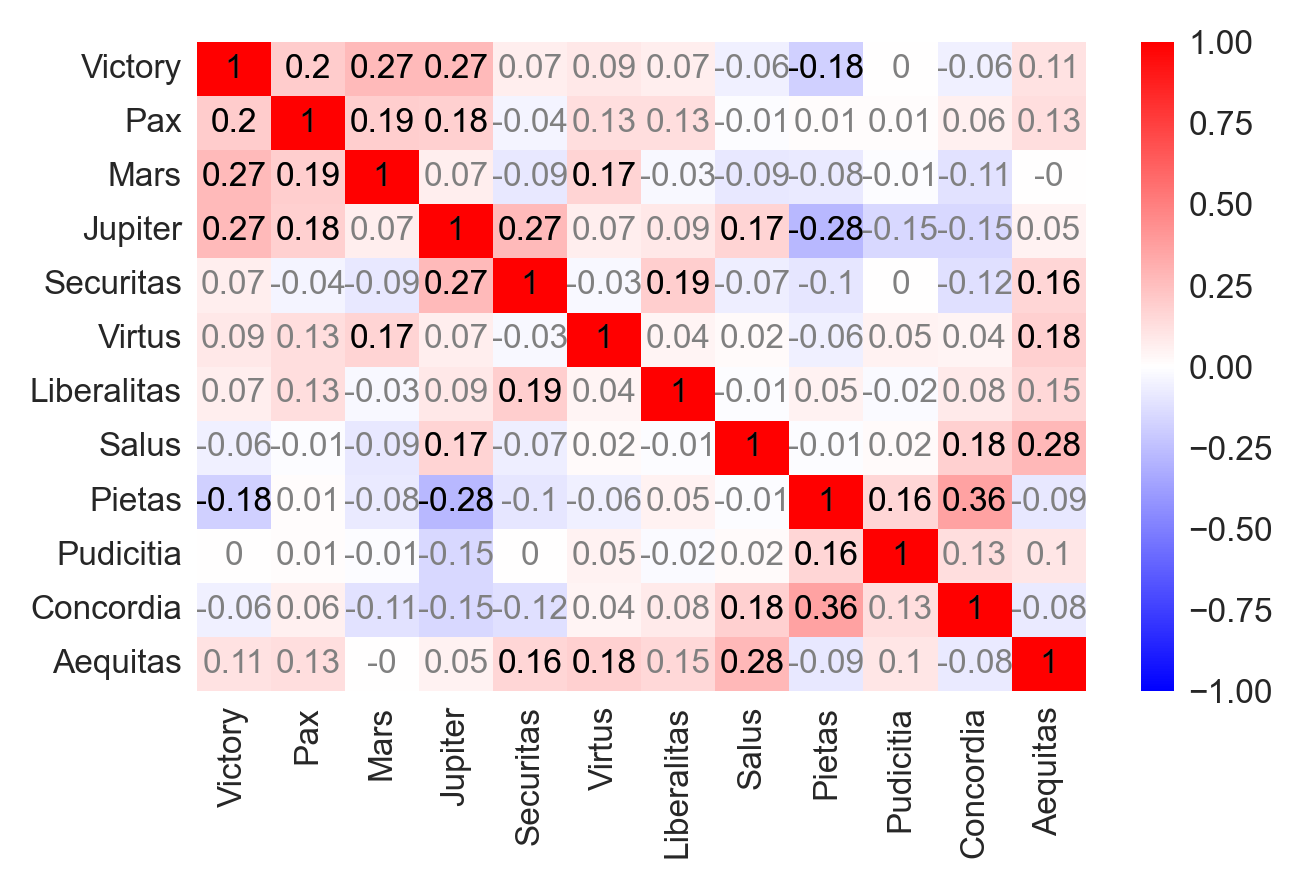

In [13]:
fig, ax = plt.subplots(tight_layout=True)
corr = df.corr(method = 'spearman').round(2)
sns.heatmap(corr,
            vmin=-1,
            annot=True,
            vmax=1,
            cmap= "bwr",
            cbar=False,
            annot_kws={"color":"grey"},
            ax=ax)
sns.heatmap(corr,
            annot=True,
            vmin=-1,
            vmax=1,
            cmap= "bwr",
            annot_kws={"color":"black"},
            mask=corr_mask,
            ax=ax)

In [14]:
save_figure(fig, "corr.png")